In [250]:
import sys

import rdkit # required for cheminformatics functionality (small molecules)
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs

import pandas as pd
import numpy as np

In [251]:
# load the molecules
with open("../data/new_descriptors/metabolite_id_classes.txt") as f:
    mols_str, mols_id, classes = zip(*[ line.strip().split() for line in f])

## 1. MACCS Distinct

In [252]:
maccs_distinct_desc = pd.read_csv('../data/new_descriptors/maccs_distinct_desc.txt', names=["fingerprint", "mol_id"], delimiter=" ")

In [253]:
maccs_distinct_desc

,fingerprint,mol_id
0,0000000000000000000000000000010000000010000100...,mol_5141
1,0000000000000000000000000000010000000100000100...,mol_5328
2,0000000000000000000000000000000000000000000000...,mol_1622
3,0000000000000000000000000000010000000010000100...,mol_5363
4,0000000000000000000000000000010000000100000100...,mol_5249
...,...,...
2166,0000000000000000000000000000000000000000000000...,mol_0123
2167,0000000000000000000000000000000000000000000000...,mol_0078
2168,0000000000000000000000000000010000000000000000...,mol_0073
2169,0000000000000000000000000000010000001010000100...,mol_0047


In [254]:
maccs_distinct_desc['mol_id'].describe()

count         2171
unique        2171
top       mol_4854
freq             1
Name: mol_id, dtype: object

In [255]:
maccs_distinct_desc_data = []

for i in range(len(maccs_distinct_desc['fingerprint'])):
    maccs_distinct_desc_data.append(np.array([int(j) for j in list(maccs_distinct_desc['fingerprint'].iloc[i])]).T)

In [256]:
maccs_distinct_desc_data

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1

In [257]:
maccs_distinct_desc_labels = []

for i in range(len(maccs_distinct_desc['mol_id'])):
    
    isFound = False
    
    if not "mol" in maccs_distinct_desc['mol_id'].iloc[i]:
        maccs_distinct_desc['mol_id'].iloc[i] = "mol_" + maccs_distinct_desc['mol_id'].iloc[i]
    
    for j in range(len(mols_id)):
        if maccs_distinct_desc['mol_id'].iloc[i] == mols_id[j]:
            maccs_distinct_desc_labels.append(classes[j])
            isFound = True
            break
            
    if isFound == False:
        print(maccs_distinct_desc['mol_id'].iloc[i])

In [258]:
maccs_distinct_desc_labels

['0,1,2,4,5,7,8,9,10',
 '8,9',
 '2',
 '1,3,8,9',
 '0,4,5,6,9',
 '0',
 '4,6',
 '0,1,4,7,10',
 '9',
 '0,1,2,4',
 '2',
 '2,6,7,8,9',
 '8',
 '0,9',
 '0',
 '1,4,5,7,8,9',
 '9',
 '5,10',
 '0,1,4,5,7,8,9,10',
 '8',
 '2,8,10',
 '10',
 '0,1,7,8,9',
 '2',
 '0,1',
 '0',
 '5',
 '0,9',
 '9',
 '2',
 '10',
 '4,10',
 '0,1,4,7,10',
 '8',
 '1,4,7',
 '3',
 '1,3,4,5,7,9',
 '0,4,7',
 '2',
 '8',
 '4,10',
 '10',
 '9',
 '9',
 '7',
 '1',
 '9',
 '8',
 '0,1,6',
 '4,9',
 '4,7,9',
 '9',
 '9',
 '1,4,7',
 '2',
 '2',
 '0,1',
 '9',
 '1,4,5,7,9',
 '0,1,2,3,4,5,7,10',
 '4',
 '10',
 '10',
 '1,7,8,9',
 '4,9',
 '9',
 '9',
 '8',
 '7',
 '2',
 '2',
 '1',
 '10',
 '4,10',
 '0,1,4,10',
 '0,1,2,4,5,9',
 '4,5,9',
 '4,9',
 '9',
 '4,7,9',
 '9',
 '9',
 '8',
 '8',
 '8',
 '6',
 '6',
 '2',
 '2',
 '0,4',
 '0',
 '9,10',
 '10',
 '9,10',
 '4,10',
 '4,10',
 '0,1,3,4,9,10',
 '10',
 '8,10',
 '4,9',
 '4,5,9',
 '8',
 '8',
 '8',
 '2,8',
 '8',
 '7',
 '7',
 '7',
 '7',
 '0,6,7',
 '0,1,2,3,4,5,6,7,8,9,10',
 '5',
 '2',
 '2',
 '0',
 '10',
 '10',
 '10',

In [259]:
len(maccs_distinct_desc_labels)

2171

In [260]:
# Convert classes to multi-class vector

multi_class_output = []

for elem in maccs_distinct_desc_labels:
    
    my_class = np.zeros(11)
    
    for num in elem.split(","):
        my_class[int(num)] = 1
        
    multi_class_output.append(my_class)

In [261]:
multi_class_output = np.array(multi_class_output)

In [262]:
np.sum(multi_class_output, axis=0)

array([133.,  79., 155.,  80., 338., 122.,  24., 243., 381., 529., 569.])

In [263]:
multi_class_output.shape

(2171, 11)

In [264]:
# Train deep neural network to perform multiclassp prediction from 2048 finger print
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.preprocessing import MinMaxScaler

In [265]:
scaler = MinMaxScaler()

maccs_distinct_desc_data = scaler.fit_transform(maccs_distinct_desc_data)

X_train, X_test, y_train, y_test = train_test_split(maccs_distinct_desc_data, multi_class_output, test_size=0.2)





In [266]:
np.sum(y_train, axis=0)

array([101.,  63., 126.,  63., 269.,  90.,  23., 182., 310., 427., 460.])

In [267]:
np.sum(y_test, axis=0)

array([ 32.,  16.,  29.,  17.,  69.,  32.,   1.,  61.,  71., 102., 109.])

In [268]:
np.sum(y_test, axis=0)/np.sum(y_train, axis=0)

array([0.31683168, 0.25396825, 0.23015873, 0.26984127, 0.25650558,
       0.35555556, 0.04347826, 0.33516484, 0.22903226, 0.23887588,
       0.23695652])

In [269]:
from skmultilearn.model_selection import iterative_train_test_split

X_train, y_train, X_test, y_test = iterative_train_test_split(maccs_distinct_desc_data, multi_class_output, test_size = 0.2)


In [270]:
np.sum(y_train, axis=0)

array([106.,  63., 124.,  64., 270.,  98.,  19., 194., 305., 423., 455.])

In [271]:
np.sum(y_test, axis=0)

array([ 27.,  16.,  31.,  16.,  68.,  24.,   5.,  49.,  76., 106., 114.])

In [272]:
np.sum(y_test, axis=0)/np.sum(y_train, axis=0)

array([0.25471698, 0.25396825, 0.25      , 0.25      , 0.25185185,
       0.24489796, 0.26315789, 0.25257732, 0.24918033, 0.25059102,
       0.25054945])

In [273]:
X_train.shape

(1739, 167)

In [274]:
model = Sequential()
model.add(Dense(256, activation='relu'))
#model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

Train on 1391 samples, validate on 348 samples
Epoch 1/20
1391/1391 [==============================] - 1s 808us/step - loss: 0.3525 - acc: 0.8738 - val_loss: 0.4316 - val_acc: 0.8809
Epoch 2/20
1391/1391 [==============================] - 0s 51us/step - loss: 0.2257 - acc: 0.9207 - val_loss: 0.3665 - val_acc: 0.8790
Epoch 3/20
1391/1391 [==============================] - 0s 58us/step - loss: 0.1938 - acc: 0.9296 - val_loss: 0.3578 - val_acc: 0.8686
Epoch 4/20
1391/1391 [==============================] - 0s 60us/step - loss: 0.1740 - acc: 0.9371 - val_loss: 0.3510 - val_acc: 0.8639
Epoch 5/20
1391/1391 [==============================] - 0s 73us/step - loss: 0.1609 - acc: 0.9399 - val_loss: 0.3252 - val_acc: 0.8670
Epoch 6/20
1391/1391 [==============================] - 0s 80us/step - loss: 0.1487 - acc: 0.9426 - val_loss: 0.3243 - val_acc: 0.8665
Epoch 7/20
1391/1391 [==============================] - 0s 61us/step - loss: 0.1395 - acc: 0.9460 - val_loss: 0.3115 - val_acc: 0.8678
Epoch 8

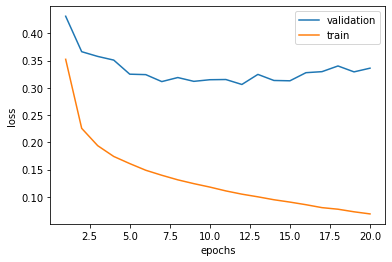

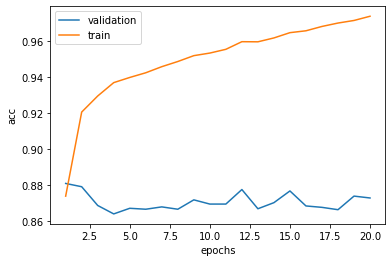

In [275]:
import matplotlib.pyplot as plt

fig = plt.figure()

plt.plot(np.arange(1,len(history.history['val_loss'])+1), history.history['val_loss'], label='validation')
plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['loss'], label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

fig = plt.figure()

plt.plot(np.arange(1,len(history.history['val_acc'])+1), history.history['val_acc'], label='validation')
plt.plot(np.arange(1,len(history.history['acc'])+1), history.history['acc'], label='train')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [276]:
y_pred = model.predict(X_test)

In [277]:
y_pred[y_pred<0.5]  = 0
y_pred[y_pred>=0.5] = 1

In [278]:
for c in range(11):
    y_true_c = y_test[:,c]
    y_pred_c = y_pred[:,c]
    
    auc       = accuracy_score(y_true_c, y_pred_c)
    precision = precision_score(y_true_c, y_pred_c)
    recall    = recall_score(y_true_c, y_pred_c)
    
    print('Class '+str(c+1)+' statistics:')
    print('Accuracy %.4f, Precision %.4f, Recall %.4f\n' %(auc, precision, recall))

Class 1 statistics:
Accuracy 0.9745, Precision 1.0000, Recall 0.5926

Class 2 statistics:
Accuracy 0.9630, Precision 0.0000, Recall 0.0000

Class 3 statistics:
Accuracy 0.9468, Precision 0.7222, Recall 0.4194

Class 4 statistics:
Accuracy 0.9606, Precision 0.0000, Recall 0.0000

Class 5 statistics:
Accuracy 0.8819, Precision 0.7179, Recall 0.4118

Class 6 statistics:
Accuracy 0.9468, Precision 0.6667, Recall 0.0833

Class 7 statistics:
Accuracy 0.9884, Precision 0.0000, Recall 0.0000

Class 8 statistics:
Accuracy 0.9213, Precision 0.7273, Recall 0.4898

Class 9 statistics:
Accuracy 0.9051, Precision 0.6923, Recall 0.8289

Class 10 statistics:
Accuracy 0.8634, Precision 0.7238, Recall 0.7170

Class 11 statistics:
Accuracy 0.9028, Precision 0.8529, Recall 0.7632



/Users/gianluca/python_venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gianluca/python_venv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Morgan distinct

In [279]:
morgan_distinct_desc = pd.read_csv('../data/new_descriptors/morgan_distinct_desc.txt', names=["fingerprint", "mol_id"], delimiter=" ")

In [280]:
morgan_distinct_desc

,fingerprint,mol_id
0,0100000001000000000000000000100001000000010000...,mol_5141
1,0000100000000100000000001000100001000000000000...,mol_5328
2,0000000000000000000000000000000001000000000000...,mol_1622
3,0000000001000000000000000000100000000000000000...,mol_5363
4,0000000000000000000000000000100001000000000000...,mol_5249
...,...,...
2166,0000000000000000000000000000000000000000000000...,mol_0123
2167,0000000000000000000000000000000000000000000000...,mol_0078
2168,0000000000000000000000000000100000000000000000...,mol_0073
2169,0100000000000100000000000000100001000000000010...,mol_0047


In [281]:
morgan_distinct_desc_data = []

for i in range(len(morgan_distinct_desc['fingerprint'])):
    morgan_distinct_desc_data.append(np.array([int(j) for j in list(morgan_distinct_desc['fingerprint'].iloc[i])]).T)

In [282]:
morgan_distinct_desc_data

[array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 1, 0, ..., 0, 0, 0]),
 array([0,

In [283]:
morgan_distinct_desc_labels = []

for i in range(len(morgan_distinct_desc['mol_id'])):
    
    isFound = False
    
    if not "mol" in morgan_distinct_desc['mol_id'].iloc[i]:
        morgan_distinct_desc['mol_id'].iloc[i] = "mol_" + morgan_distinct_desc['mol_id'].iloc[i]
    
    for j in range(len(mols_id)):
        if morgan_distinct_desc['mol_id'].iloc[i] == mols_id[j]:
            morgan_distinct_desc_labels.append(classes[j])
            isFound = True
            break
            
    if isFound == False:
        print(morgan_distinct_desc['mol_id'].iloc[i])

In [284]:
morgan_distinct_desc_labels

['0,1,2,4,5,7,8,9,10',
 '8,9',
 '2',
 '1,3,8,9',
 '0,4,5,6,9',
 '0',
 '4,6',
 '0,1,4,7,10',
 '9',
 '0,1,2,4',
 '2',
 '2,6,7,8,9',
 '8',
 '0,9',
 '0',
 '1,4,5,7,8,9',
 '9',
 '5,10',
 '0,1,4,5,7,8,9,10',
 '8',
 '2,8,10',
 '10',
 '0,1,7,8,9',
 '2',
 '0,1',
 '0',
 '5',
 '0,9',
 '9',
 '2',
 '10',
 '4,10',
 '0,1,4,7,10',
 '8',
 '1,4,7',
 '3',
 '1,3,4,5,7,9',
 '0,4,7',
 '2',
 '8',
 '4,10',
 '10',
 '9',
 '9',
 '7',
 '1',
 '9',
 '8',
 '0,1,6',
 '4,9',
 '4,7,9',
 '9',
 '9',
 '1,4,7',
 '2',
 '2',
 '0,1',
 '9',
 '1,4,5,7,9',
 '0,1,2,3,4,5,7,10',
 '4',
 '10',
 '10',
 '1,7,8,9',
 '4,9',
 '9',
 '9',
 '8',
 '7',
 '2',
 '2',
 '1',
 '10',
 '4,10',
 '0,1,4,10',
 '0,1,2,4,5,9',
 '4,5,9',
 '4,9',
 '9',
 '4,7,9',
 '9',
 '9',
 '8',
 '8',
 '8',
 '6',
 '6',
 '2',
 '2',
 '0,4',
 '0',
 '9,10',
 '10',
 '9,10',
 '4,10',
 '4,10',
 '0,1,3,4,9,10',
 '10',
 '8,10',
 '4,9',
 '4,5,9',
 '8',
 '8',
 '8',
 '2,8',
 '8',
 '7',
 '7',
 '7',
 '7',
 '0,6,7',
 '0,1,2,3,4,5,6,7,8,9,10',
 '5',
 '2',
 '2',
 '0',
 '10',
 '10',
 '10',

In [285]:
# Convert classes to multi-class vector

multi_class_output = []

for elem in morgan_distinct_desc_labels:
    
    my_class = np.zeros(11)
    
    for num in elem.split(","):
        my_class[int(num)] = 1
        
    multi_class_output.append(my_class)

In [286]:
multi_class_output

[array([1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.]),
 array([1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.]),
 array([1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]),
 array([1., 1., 0., 0., 1., 

In [287]:
np.sum(multi_class_output, axis=0)

array([133.,  79., 155.,  80., 338., 122.,  24., 243., 381., 529., 569.])

In [288]:
scaler = MinMaxScaler()

morgan_distinct_desc_data = scaler.fit_transform(morgan_distinct_desc_data)

X_train, X_test, y_train, y_test = train_test_split(morgan_distinct_desc_data, multi_class_output, test_size=0.2)






In [289]:
np.sum(y_test, axis=0)/np.sum(y_train, axis=0)

array([0.20909091, 0.27419355, 0.29166667, 0.23076923, 0.33070866,
       0.22      , 0.26315789, 0.22727273, 0.24104235, 0.28710462,
       0.24507659])

In [290]:
multi_class_output = np.array(multi_class_output)

In [291]:
X_train, y_train, X_test, y_test = iterative_train_test_split(morgan_distinct_desc_data, multi_class_output, test_size = 0.2)



In [292]:
np.sum(y_test, axis=0)/np.sum(y_train, axis=0)

array([0.25471698, 0.25396825, 0.25      , 0.25      , 0.25185185,
       0.24489796, 0.26315789, 0.25257732, 0.24918033, 0.25059102,
       0.25054945])

In [293]:
X_train.shape

(1739, 1024)

In [294]:
y_train = np.array(y_train)

In [295]:
y_test = np.array(y_test)

In [296]:
model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

Train on 1391 samples, validate on 348 samples
Epoch 1/20
1391/1391 [==============================] - 4s 3ms/step - loss: 0.2258 - acc: 0.9133 - val_loss: 0.3961 - val_acc: 0.8464
Epoch 2/20
1391/1391 [==============================] - 3s 2ms/step - loss: 0.0986 - acc: 0.9592 - val_loss: 0.3702 - val_acc: 0.8704
Epoch 3/20
1391/1391 [==============================] - 3s 2ms/step - loss: 0.0539 - acc: 0.9770 - val_loss: 0.3590 - val_acc: 0.8817
Epoch 4/20
1391/1391 [==============================] - 3s 2ms/step - loss: 0.0322 - acc: 0.9858 - val_loss: 0.4639 - val_acc: 0.8655
Epoch 5/20
1391/1391 [==============================] - 3s 2ms/step - loss: 0.0220 - acc: 0.9912 - val_loss: 0.5766 - val_acc: 0.8822
Epoch 6/20
1391/1391 [==============================] - 3s 2ms/step - loss: 0.0137 - acc: 0.9956 - val_loss: 0.6069 - val_acc: 0.8527
Epoch 7/20
1391/1391 [==============================] - 3s 2ms/step - loss: 0.0094 - acc: 0.9971 - val_loss: 0.6574 - val_acc: 0.8587
Epoch 8/20
1391

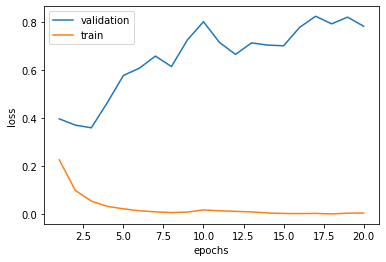

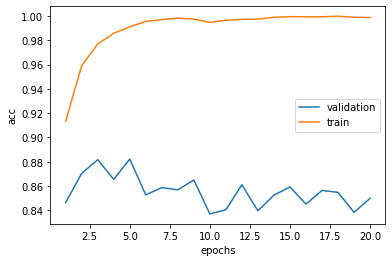

In [297]:
fig = plt.figure()

plt.plot(np.arange(1,len(history.history['val_loss'])+1), history.history['val_loss'], label='validation')
plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['loss'], label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

fig = plt.figure()

plt.plot(np.arange(1,len(history.history['val_acc'])+1), history.history['val_acc'], label='validation')
plt.plot(np.arange(1,len(history.history['acc'])+1), history.history['acc'], label='train')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [298]:
y_pred = model.predict(X_test)

In [299]:
y_pred[y_pred<0.5]  = 0
y_pred[y_pred>=0.5] = 1

In [300]:
for c in range(11):
    y_true_c = y_test[:,c]
    y_pred_c = y_pred[:,c]
    
    auc       = accuracy_score(y_true_c, y_pred_c)
    precision = precision_score(y_true_c, y_pred_c)
    recall    = recall_score(y_true_c, y_pred_c)
    
    print('Class '+str(c+1)+' statistics:')
    print('Accuracy %.4f, Precision %.4f, Recall %.4f\n' %(auc, precision, recall))

Class 1 statistics:
Accuracy 0.9514, Precision 0.6667, Recall 0.4444

Class 2 statistics:
Accuracy 0.9606, Precision 0.4444, Recall 0.2500

Class 3 statistics:
Accuracy 0.9560, Precision 0.6875, Recall 0.7097

Class 4 statistics:
Accuracy 0.9676, Precision 0.6000, Recall 0.3750

Class 5 statistics:
Accuracy 0.8565, Precision 0.5600, Recall 0.4118

Class 6 statistics:
Accuracy 0.9398, Precision 0.4000, Recall 0.1667

Class 7 statistics:
Accuracy 0.9861, Precision 0.0000, Recall 0.0000

Class 8 statistics:
Accuracy 0.9144, Precision 0.6500, Recall 0.5306

Class 9 statistics:
Accuracy 0.9074, Precision 0.7195, Recall 0.7763

Class 10 statistics:
Accuracy 0.8380, Precision 0.6268, Recall 0.8396

Class 11 statistics:
Accuracy 0.8796, Precision 0.7719, Recall 0.7719



## 3. MACCS

In [301]:
maccs_desc = pd.read_csv('../data/new_descriptors/maccs_desc.txt', names=["fingerprint", "mol_id"], delimiter=" ")

In [302]:
maccs_desc

,fingerprint,mol_id
0,0000000000000000000000000000000000000000000000...,mol_0001
1,0000000000000000000000000000010000000010000100...,mol_0002
2,0000000000000000000000000000000000000000000000...,mol_0003
3,0000000000000000000000000000000000000000000000...,mol_0005
4,0000000000000000000000000000010000001010000100...,mol_0006
...,...,...
6492,0000000000000000000000000000010000000100001100...,mol_6665
6493,0000000000000000000000000000010000000100001100...,mol_6666
6494,0000000000000000000000000000000000000000000000...,mol_6667
6495,0000000000000000000000000000010000000010000101...,mol_6668


In [303]:
maccs_desc['mol_id'].describe()

count         6497
unique        6497
top       mol_4854
freq             1
Name: mol_id, dtype: object

In [304]:
maccs_desc_data = []

for i in range(len(maccs_desc['fingerprint'])):
    maccs_desc_data.append(np.array([int(j) for j in list(maccs_desc['fingerprint'].iloc[i])]).T)

In [305]:
maccs_desc_labels = []

for i in range(len(maccs_desc['mol_id'])):
    
    isFound = False
    
    if not "mol" in maccs_desc['mol_id'].iloc[i]:
        
        if len(maccs_desc['mol_id'].iloc[i]) == 3:
        
            maccs_desc['mol_id'].iloc[i] = "mol_0" + maccs_desc['mol_id'].iloc[i]
            
        else:
            
            maccs_desc['mol_id'].iloc[i] = "mol_" + maccs_desc['mol_id'].iloc[i]
            
        #print(maccs_desc['mol_id'].iloc[i])
    
    for j in range(len(mols_id)):
        if maccs_desc['mol_id'].iloc[i] == mols_id[j]:
            maccs_desc_labels.append(classes[j])
            isFound = True
            break
            
    if isFound == False:
        print("Here")
        print(maccs_desc['mol_id'].iloc[i])

In [306]:
len(maccs_desc_labels)

6497

In [307]:
# Convert classes to multi-class vector

multi_class_output = []

for elem in maccs_desc_labels:
    
    my_class = np.zeros(11)
    
    for num in elem.split(","):
        my_class[int(num)] = 1
        
    multi_class_output.append(my_class)

In [308]:
scaler = MinMaxScaler()

maccs_desc_data = scaler.fit_transform(maccs_desc_data)

X_train, X_test, y_train, y_test = train_test_split(maccs_desc_data, multi_class_output, test_size=0.2)







In [309]:
np.sum(y_test, axis=0)/np.sum(y_train, axis=0)

array([0.25930372, 0.2518797 , 0.25595985, 0.27896996, 0.25414365,
       0.2961165 , 0.31111111, 0.24964739, 0.26512456, 0.26193724,
       0.22971741])

In [310]:
multi_class_output = np.array(multi_class_output)

In [311]:
X_train, y_train, X_test, y_test = iterative_train_test_split(maccs_desc_data, multi_class_output, test_size = 0.2)


In [312]:
np.sum(y_test, axis=0)/np.sum(y_train, axis=0)

array([0.25029797, 0.31360947, 0.24968789, 0.25210084, 0.24954128,
       0.28365385, 0.32286996, 0.24964739, 0.24956063, 0.25      ,
       0.2502317 ])

In [313]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [314]:
model = Sequential()
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

Train on 4256 samples, validate on 1064 samples
Epoch 1/20
4256/4256 [==============================] - 5s 1ms/step - loss: 0.2567 - acc: 0.8919 - val_loss: 0.5843 - val_acc: 0.8225
Epoch 2/20
4256/4256 [==============================] - 4s 824us/step - loss: 0.1803 - acc: 0.9236 - val_loss: 0.5955 - val_acc: 0.8413
Epoch 3/20
4256/4256 [==============================] - 4s 913us/step - loss: 0.1527 - acc: 0.9361 - val_loss: 0.5654 - val_acc: 0.8372
Epoch 4/20
4256/4256 [==============================] - 4s 845us/step - loss: 0.1277 - acc: 0.9478 - val_loss: 0.5848 - val_acc: 0.8297
Epoch 5/20
4256/4256 [==============================] - 4s 1ms/step - loss: 0.1147 - acc: 0.9523 - val_loss: 0.7122 - val_acc: 0.8385
Epoch 6/20
4256/4256 [==============================] - 4s 1ms/step - loss: 0.1023 - acc: 0.9572 - val_loss: 0.6489 - val_acc: 0.8289
Epoch 7/20
4256/4256 [==============================] - 4s 934us/step - loss: 0.0927 - acc: 0.9617 - val_loss: 0.7552 - val_acc: 0.8499
Epoch 

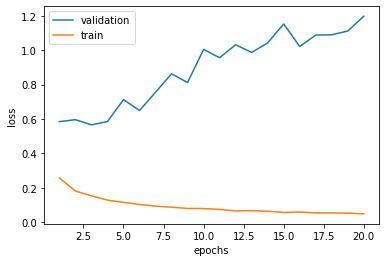

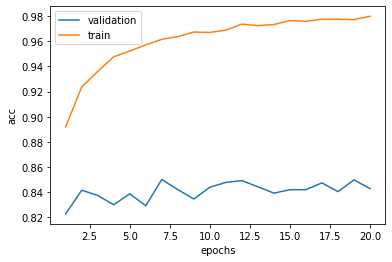

In [315]:
fig = plt.figure()

plt.plot(np.arange(1,len(history.history['val_loss'])+1), history.history['val_loss'], label='validation')
plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['loss'], label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

fig = plt.figure()

plt.plot(np.arange(1,len(history.history['val_acc'])+1), history.history['val_acc'], label='validation')
plt.plot(np.arange(1,len(history.history['acc'])+1), history.history['acc'], label='train')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [316]:
y_pred = model.predict(X_test)

In [317]:
y_pred[y_pred<0.5]  = 0
y_pred[y_pred>=0.5] = 1

In [318]:
for c in range(11):
    y_true_c = y_test[:,c]
    y_pred_c = y_pred[:,c]
    
    auc       = accuracy_score(y_true_c, y_pred_c)
    precision = precision_score(y_true_c, y_pred_c)
    recall    = recall_score(y_true_c, y_pred_c)
    
    print('Class '+str(c+1)+' statistics:')
    print('Accuracy %.4f, Precision %.4f, Recall %.4f\n' %(auc, precision, recall))

Class 1 statistics:
Accuracy 0.9422, Precision 0.7910, Recall 0.9190

Class 2 statistics:
Accuracy 0.9176, Precision 0.6761, Recall 0.7484

Class 3 statistics:
Accuracy 0.9490, Precision 0.8302, Recall 0.8800

Class 4 statistics:
Accuracy 0.9898, Precision 0.9000, Recall 0.9000

Class 5 statistics:
Accuracy 0.8972, Precision 0.7337, Recall 0.8713

Class 6 statistics:
Accuracy 0.9601, Precision 0.8586, Recall 0.7203

Class 7 statistics:
Accuracy 0.9745, Precision 0.8500, Recall 0.7083

Class 8 statistics:
Accuracy 0.9405, Precision 0.7892, Recall 0.8249

Class 9 statistics:
Accuracy 0.8989, Precision 0.7570, Recall 0.8556

Class 10 statistics:
Accuracy 0.9023, Precision 0.8329, Recall 0.8622

Class 11 statistics:
Accuracy 0.8386, Precision 0.8333, Recall 0.3704



## 4. Morgan

In [319]:
morgan_desc = pd.read_csv('../data/new_descriptors/morgan_desc.txt', names=["fingerprint", "mol_id"], delimiter=" ")

In [320]:
morgan_desc

,fingerprint,mol_id
0,0000000000000000000000000000000001000000000000...,mol_0001
1,0100000001000100000000000000100001000000010000...,mol_0002
2,0000000000000100000000000000000000000000000000...,mol_0003
3,0000000000000000000000000000000000000000000000...,mol_0005
4,0001000000000100000000000010100001000000000010...,mol_0006
...,...,...
6492,0000100000000000000000000000100000000000000000...,mol_6665
6493,0000100000000000000000000000100000000000000000...,mol_6666
6494,0000000000000000001000000000000000000000000000...,mol_6667
6495,0100000001000000000000000000100000000000000000...,mol_6668


In [321]:
morgan_desc_data = []

for i in range(len(morgan_desc['fingerprint'])):
    morgan_desc_data.append(np.array([int(j) for j in list(morgan_desc['fingerprint'].iloc[i])]).T)

In [322]:
morgan_desc_labels = []

for i in range(len(morgan_desc['mol_id'])):
    
    isFound = False
    
    if not "mol" in morgan_desc['mol_id'].iloc[i]:
        
        if len(morgan_desc['mol_id'].iloc[i]) == 3:
        
            morgan_desc['mol_id'].iloc[i] = "mol_0" + morgan_desc['mol_id'].iloc[i]
            
        else:
            
            morgan_desc['mol_id'].iloc[i] = "mol_" + morgan_desc['mol_id'].iloc[i]
            
        #print(maccs_desc['mol_id'].iloc[i])
    
    for j in range(len(mols_id)):
        if morgan_desc['mol_id'].iloc[i] == mols_id[j]:
            morgan_desc_labels.append(classes[j])
            isFound = True
            break
            
    if isFound == False:
        print("Here")
        print(morgan_desc['mol_id'].iloc[i])

In [323]:
len(morgan_desc_labels)

6497

In [324]:
# Convert classes to multi-class vector

multi_class_output = []

for elem in morgan_desc_labels:
    
    my_class = np.zeros(11)
    
    for num in elem.split(","):
        my_class[int(num)] = 1
        
    multi_class_output.append(my_class)

In [325]:
multi_class_output = np.array(multi_class_output)

In [326]:
scaler = MinMaxScaler()

morgan_desc_data = scaler.fit_transform(morgan_desc_data)

X_train, X_test, y_train, y_test = train_test_split(morgan_desc_data, multi_class_output, test_size=0.2)








In [327]:
np.sum(y_test, axis=0)/np.sum(y_train, axis=0)

array([0.23557126, 0.24022346, 0.26229508, 0.26808511, 0.25068871,
       0.24475524, 0.22406639, 0.25673759, 0.23116883, 0.23251166,
       0.25139147])

In [328]:
X_train, y_train, X_test, y_test = iterative_train_test_split(morgan_desc_data, multi_class_output, test_size = 0.2)



In [336]:
np.sum(y_train, axis=0)

array([ 839.,  507.,  801.,  238., 1090.,  416.,  223.,  709., 1138.,
       1480., 1079.])

In [337]:
np.sum(y_test, axis=0)

array([210., 159., 200.,  60., 272., 118.,  72., 177., 284., 370., 270.])

In [329]:
np.sum(y_test, axis=0)/np.sum(y_train, axis=0)

array([0.25029797, 0.31360947, 0.24968789, 0.25210084, 0.24954128,
       0.28365385, 0.32286996, 0.24964739, 0.24956063, 0.25      ,
       0.2502317 ])

In [330]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [338]:
X_train.shape

(5320, 1024)

In [339]:
model = Sequential()
#model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=10, validation_split=0.2)

Train on 4256 samples, validate on 1064 samples
Epoch 1/20
4256/4256 [==============================] - 4s 950us/step - loss: 0.2055 - acc: 0.9146 - val_loss: 0.5403 - val_acc: 0.8531
Epoch 2/20
4256/4256 [==============================] - 2s 580us/step - loss: 0.0972 - acc: 0.9630 - val_loss: 0.5439 - val_acc: 0.8587
Epoch 3/20
4256/4256 [==============================] - 2s 575us/step - loss: 0.0625 - acc: 0.9785 - val_loss: 0.5679 - val_acc: 0.8472
Epoch 4/20
4256/4256 [==============================] - 2s 585us/step - loss: 0.0428 - acc: 0.9855 - val_loss: 0.7225 - val_acc: 0.8445
Epoch 5/20
4256/4256 [==============================] - 3s 588us/step - loss: 0.0329 - acc: 0.9888 - val_loss: 0.7600 - val_acc: 0.8442
Epoch 6/20
4256/4256 [==============================] - 3s 596us/step - loss: 0.0279 - acc: 0.9911 - val_loss: 0.8184 - val_acc: 0.8559
Epoch 7/20
4256/4256 [==============================] - 3s 600us/step - loss: 0.0254 - acc: 0.9913 - val_loss: 0.8593 - val_acc: 0.8415


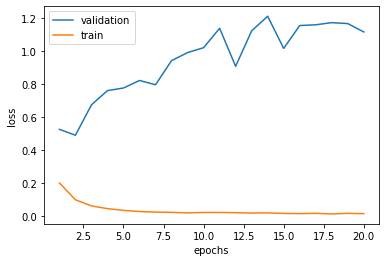

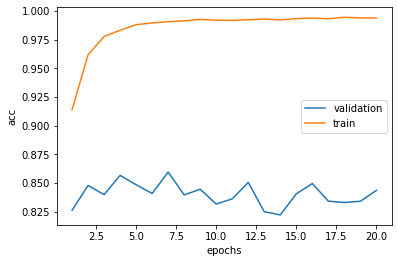

In [332]:
fig = plt.figure()

plt.plot(np.arange(1,len(history.history['val_loss'])+1), history.history['val_loss'], label='validation')
plt.plot(np.arange(1,len(history.history['loss'])+1), history.history['loss'], label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

fig = plt.figure()

plt.plot(np.arange(1,len(history.history['val_acc'])+1), history.history['val_acc'], label='validation')
plt.plot(np.arange(1,len(history.history['acc'])+1), history.history['acc'], label='train')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [333]:
y_pred = model.predict(X_test)

In [334]:
y_pred[y_pred<0.5]  = 0
y_pred[y_pred>=0.5] = 1

In [335]:
for c in range(11):
    y_true_c = y_test[:,c]
    y_pred_c = y_pred[:,c]
    
    auc       = accuracy_score(y_true_c, y_pred_c)
    precision = precision_score(y_true_c, y_pred_c)
    recall    = recall_score(y_true_c, y_pred_c)
    
    print('Class '+str(c+1)+' statistics:')
    print('Accuracy %.4f, Precision %.4f, Recall %.4f\n' %(auc, precision, recall))

Class 1 statistics:
Accuracy 0.9482, Precision 0.8041, Recall 0.9381

Class 2 statistics:
Accuracy 0.9439, Precision 0.7598, Recall 0.8553

Class 3 statistics:
Accuracy 0.9567, Precision 0.8634, Recall 0.8850

Class 4 statistics:
Accuracy 0.9788, Precision 0.7612, Recall 0.8500

Class 5 statistics:
Accuracy 0.8895, Precision 0.7261, Recall 0.8382

Class 6 statistics:
Accuracy 0.9677, Precision 0.8509, Recall 0.8220

Class 7 statistics:
Accuracy 0.9881, Precision 0.9028, Recall 0.9028

Class 8 statistics:
Accuracy 0.9499, Precision 0.8138, Recall 0.8644

Class 9 statistics:
Accuracy 0.9286, Precision 0.7890, Recall 0.9613

Class 10 statistics:
Accuracy 0.9269, Precision 0.8797, Recall 0.8892

Class 11 statistics:
Accuracy 0.8445, Precision 0.8480, Recall 0.3926

